In [11]:
import os
from glob import glob
import zipfile
import librosa
import librosa.display
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

import utils_lib

plt.rcParams['figure.figsize'] = (17, 5)

def read_data():
    # with zipfile.ZipFile('fma_small.zip', 'r') as zip_ref:
    #     zip_ref.extractall('data_mp3')
    # filenames = zip_ref.namelist()
    # list dir recursively in one line using glob
    filenames = [y for x in os.walk('data_mp3') for y in glob(os.path.join(x[0], '*.mp3'))]
    filenames = filenames[:5]
    print(filenames)
    data = []
    sampling_rate = []
    for filename in filenames:
        print("Reading file: " + filename)
        if filename.endswith('.mp3'):
            data_n, sampling_rate_n = librosa.load(filename, duration=10)
            data.append(data_n)
            sampling_rate.append(sampling_rate_n)
    return data, sampling_rate


data, sampling_rate = read_data()

['data_mp3\\fma_small\\000\\000002.mp3', 'data_mp3\\fma_small\\000\\000005.mp3', 'data_mp3\\fma_small\\000\\000010.mp3', 'data_mp3\\fma_small\\000\\000140.mp3', 'data_mp3\\fma_small\\000\\000141.mp3']
Reading file: data_mp3\fma_small\000\000002.mp3
Reading file: data_mp3\fma_small\000\000005.mp3
Reading file: data_mp3\fma_small\000\000010.mp3
Reading file: data_mp3\fma_small\000\000140.mp3
Reading file: data_mp3\fma_small\000\000141.mp3


# DATA VISUALIZATION

<Figure size 1200x400 with 0 Axes>

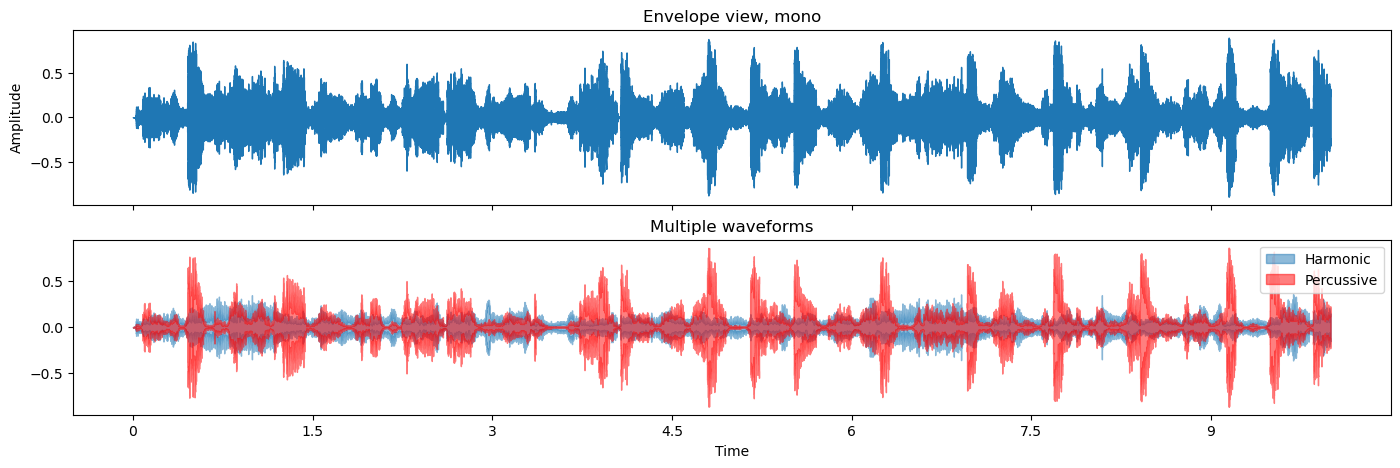

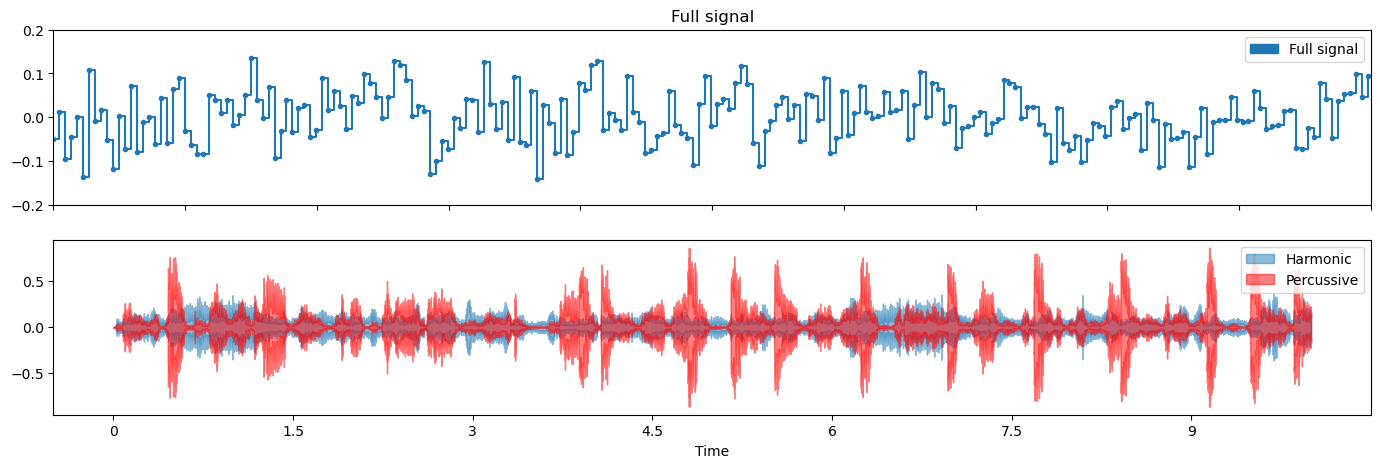

In [6]:
# TODO: DODAĆ DLA RÓŻNYCH KLAS
def plot_signal(y, sr):
    plt.figure(figsize=(12, 4))
    fig, ax = plt.subplots(nrows=2, sharex=True)
    librosa.display.waveshow(np.array(y), sr=sr, ax=ax[0])
    ax[0].set(title='Envelope view, mono')
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Amplitude")
    ax[0].label_outer()
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1], label='Percussive')
    ax[1].set(title='Multiple waveforms')
    ax[1].legend()


    fig, (ax, ax2) = plt.subplots(nrows=2)
    ax.set(xlim=[6.0, 6.01], title='Full signal', ylim=[-0.2, 0.2])
    librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
    librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
    ax.label_outer()
    ax.legend()
    ax2.legend()

plot_signal(data[0], sampling_rate[0])

TODO: wniosek - czy gołym okiem widać różnice w klasach?

### HISTOGRAM ROZKŁADU KLAS

In [12]:
tracks = utils_lib.load('data/tracks.csv')
features = utils_lib.load('data/features.csv')
np.testing.assert_array_equal(features.index, tracks.index)

tracks.shape

(106574, 52)

In [8]:
small = tracks[tracks['set', 'subset'] <= 'small']
print(small.shape)
small.head(10)

(8000, 52)


album                                                           \
         comments        date_created date_released engineer favorites  id   
track_id                                                                     
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4   1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4   1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4   6   
140             1 2008-11-26 01:49:59    2007-05-22      NaN         1  61   
141             0 2008-11-26 01:49:57    2009-01-16      NaN         1  60   
148             0 2008-11-26 01:50:19    2009-01-15      NaN         0  66   
182             0 2008-11-26 01:52:18    2005-04-26      NaN         0  80   
190             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   
193             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   
194             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
140       <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...    1300   
141       <p>A full ensamble of strings, drums, electron...    1304   
148       <p>"Compositions for electronics and voice." I...    1831   
182       <p><em>Worn Copy</em> is    the history of pop...    5289   
190       <p><em>Blue Piano</em> is an unreleased collec...   12333   
193       <p><em>Blue Piano</em> is an unreleased collec...   12333   
194       <p><em>Blue Piano</em> is an unreleased collec...   12333   

                                               ...       track           \
                                producer tags  ... information interest   
track_id                                       ...                        
2                                    NaN   []  ...         NaN     4656   
5                                    NaN   []  ...         NaN     1933   
10                                   NaN   []  ...         NaN    54881   
140       Alec K. Refearn, Rob Pemberton   []  ...         NaN     1593   
141                                  NaN   []  ...         NaN      839   
148                                  NaN   []  ...         NaN     2437   
182                                  NaN   []  ...         NaN     5990   
190                                  NaN   []  ...         NaN     1758   
193                                  NaN   []  ...         NaN     1679   
194                                  NaN   []  ...         NaN     1780   

                                                                           \
         language_code                                            license   
track_id                                                                    
2                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
5                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
10                  en  Attribution-NonCommercial-NoDerivatives (aka M...   
140                 en  Attribution-Noncommercial-No Derivative Works ...   
141                 en  Attribution-Noncommercial-No Derivative Works ...   
148                 en  Attribution-Noncommercial-Share Alike 3.0 Unit...   
182                 en  Attribution-Noncommercial-No Derivative Works ...   
190                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
193                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
194                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

                                                                        
         listens lyric

Text(0, 0.5, 'Number of tracks')

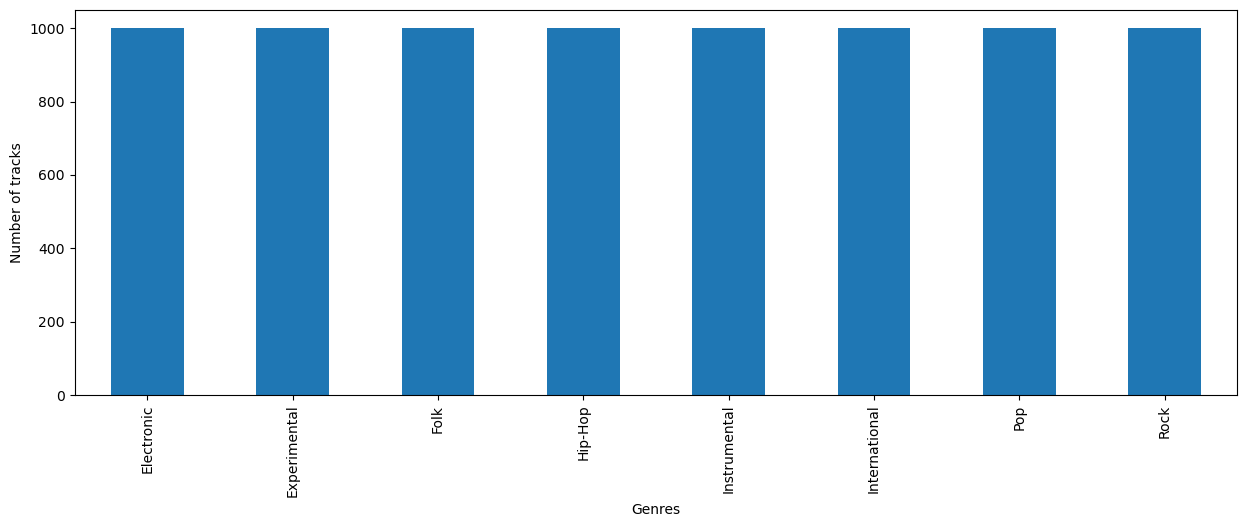

In [11]:
small['track', 'genre_top'].value_counts()[0:8].plot(kind='bar', figsize=(15, 5))
plt.xlabel('Genres')
plt.ylabel('Number of tracks')


In [12]:
# Add measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


def acc(y_test, y_pred):
    return accuracy_score(y_test, y_pred)


# Add Confusion Matrix
def conf_mat(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)


# Add F1 Score
def f1(y_test, y_pred):
    return classification_report(y_test, y_pred)


# PODZIAŁ NA ZBIÓR TESTOWY I TRENINGOWY

In [13]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes


In [3]:
# get all spectrograms file names
from pathlib import Path
spectrograms = [x.name for x in Path('data/spectrograms').glob('*.npy')]
spectrograms

['000002.npy',
 '000005.npy',
 '000010.npy',
 '000140.npy',
 '000141.npy',
 '000148.npy',
 '000182.npy',
 '000190.npy',
 '000193.npy',
 '000194.npy',
 '000197.npy',
 '000200.npy',
 '000203.npy',
 '000204.npy',
 '000207.npy',
 '000210.npy',
 '000211.npy',
 '000212.npy',
 '000213.npy',
 '000255.npy',
 '000256.npy',
 '000368.npy',
 '000424.npy',
 '000459.npy',
 '000534.npy',
 '000540.npy',
 '000546.npy',
 '000574.npy',
 '000602.npy',
 '000615.npy',
 '000620.npy',
 '000621.npy',
 '000625.npy',
 '000666.npy',
 '000667.npy',
 '000676.npy',
 '000690.npy',
 '000694.npy',
 '000695.npy',
 '000704.npy',
 '000705.npy',
 '000706.npy',
 '000707.npy',
 '000708.npy',
 '000709.npy',
 '000714.npy',
 '000715.npy',
 '000716.npy',
 '000718.npy',
 '000777.npy',
 '000814.npy',
 '000821.npy',
 '000822.npy',
 '000825.npy',
 '000853.npy',
 '000890.npy',
 '000892.npy',
 '000897.npy',
 '000993.npy',
 '000995.npy',
 '000997.npy',
 '000998.npy',
 '001039.npy',
 '001040.npy',
 '001066.npy',
 '001069.npy',
 '001073.n

In [6]:
from glob import glob
import os
import librosa
import numpy as np

def get_spectrogram(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

# read data in memory efficient way using generator, process it to get spectrogram and save it to file
def spectrogram_generator():
    filenames = [y for x in os.walk('data_mp3') for y in glob(os.path.join(x[0], '*.mp3'))]
    for filename in filenames:
        if filename.endswith('.mp3'):
            name = os.path.splitext(os.path.basename(filename))[0]
            # get spectrogram only if it doesn't exist
            if name + '.npy' not in spectrograms:
                try:
                    data, sampling_rate = librosa.load(filename, duration=10)
                    log_S = get_spectrogram(data, sampling_rate)
                    # get filename without extension
                    yield name, log_S
                except:
                    print('Error reading file: ' + filename)


for name, log_S in spectrogram_generator():
    # save spectrogram only if it doesn't exist
    if name + '.npy' not in spectrograms:
        np.save('data/spectrograms/' + name + '.npy', log_S)

d:\Programy\miniconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error reading file: data_mp3\fma_small\099\099134.mp3


d:\Programy\miniconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error reading file: data_mp3\fma_small\108\108925.mp3
Error reading file: data_mp3\fma_small\133\133297.mp3


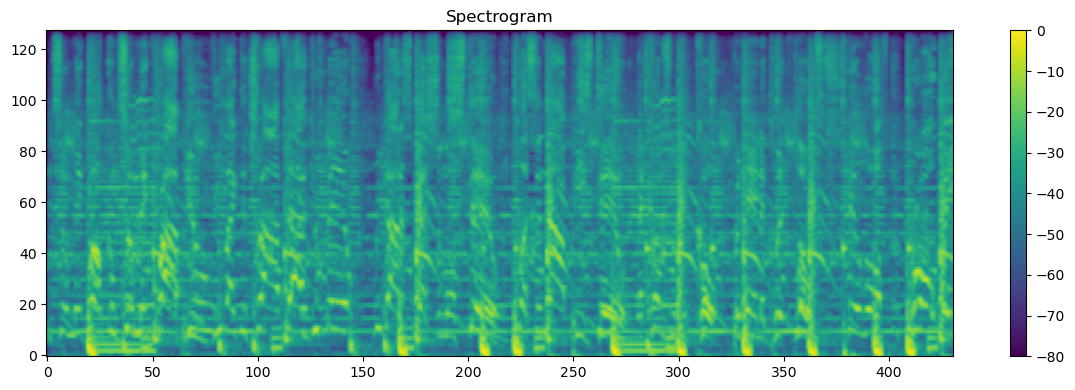

In [8]:
import matplotlib.pyplot as plt
# show first spectrogram
plt.figure(figsize=(12, 4))
plt.imshow(np.load('data/spectrograms/000002.npy'), aspect='auto', origin='lower')
plt.colorbar()
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

In [26]:
# Load spectrograms from files according to names from x_train and x_test
def load_spectrograms(x):
    spectrograms = np.array([np.load('data/spectrograms/' + name + '.npy') for name in x])
    return spectrograms
    
# Load spectrograms from files according to names from x_train and x_test
# format names to have 6 digits extension
x_train_names = ['{:06d}'.format(x) for x in X_train.index]
x_test_names = ['{:06d}'.format(x) for x in X_test.index]

x_train = load_spectrograms(x_train_names)
x_test = load_spectrograms(x_test_names)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf

# input image dimensions
img_rows, img_cols = 128, 431

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# number of classes
nb_classes = y_train.unique().size

y_train = to_categorical(y_train.cat.codes)
y_test = to_categorical(y_test.cat.codes)

x_train = np.array([x.reshape((img_rows, img_cols, 1)) for x in x_train])
x_test = np.array([x.reshape((img_rows, img_cols, 1)) for x in x_test])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= np.min(x_train)
x_test /= np.min(x_test)

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])